In [133]:
import urllib.request # for reading from website
from bs4 import BeautifulSoup # for removing html5 elements
from nltk.tokenize import word_tokenize # for tokenizing
import re # for removing special characters
import spacy # spacy
import nltk # for frequency distribution counter
import matplotlib.pyplot as plt # for plotting

In [134]:
# read from apple website
response = urllib.request.urlopen("https://www.apple.com/ipad-pro/")
html = response.read()
# print(html)

In [135]:
# Remove all html5 elements using BeautifulSoup
soup = BeautifulSoup(html, 'html5lib')
text = soup.get_text(strip=True)
# print(text)

In [136]:
# spacy 
sp = spacy.load('en_core_web_sm')

# generating stop_words
all_stopwords = sp.Defaults.stop_words

# adding some common expected words in the website like Apple, iPad, etc
all_stopwords |= {"ipad", "pro", "11", "12.9", "apple", "s", "https", "menuclose","" }

In [137]:
# creating tokens
tokens = word_tokenize(text)

# converting all tokens to lower case
tokens = [token.lower() for token in tokens]

In [138]:
# removing special characters
tokens = [re.sub('\W+','', token) for token in tokens]
# for token in tokens:
#     print(token)

# Remove stop words like "a", "at", "the", etc
tokens_without_sw = [w for w in tokens if not w in all_stopwords]
# print(tokens_without_sw)

In [139]:
# Frequency distribution of Tokens

freq = nltk.FreqDist(tokens_without_sw)

# print frequency
# for key, val in freq.items():
#     print(str(key)+":"+str(val))
    

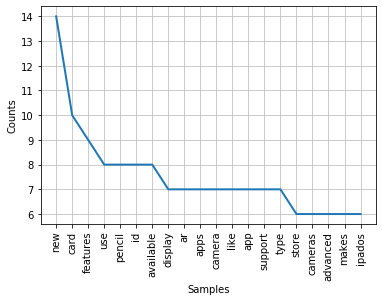

In [140]:
# Plot data for visualization
freq.plot(50, cumulative=False)